In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("titanic_train.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


observation- 
from the above given data we can easily conclude that the column of Passenger id, Name , ticket and cabin are playing very very less significant role or we can say no role in the data set , hence we can drop the coloumn

In [5]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
## Now description of data 
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####  from the above description we can clearly conclude that 
#### there are lots of null values in Age column 

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### we can see that there are also 2 null value in Embarked column which is insignificant we can drop that perticular row 
### but we cant drop the 177 null values in the age column so we have to impute these value through suitable method .

In [10]:
# droping null values of Embarked column
df=df.dropna(subset=['Embarked'])

In [11]:
# checking shape of data 
df.shape

(889, 8)

In [12]:
# checking nulls again
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Text(0, 0.5, 'AGE')

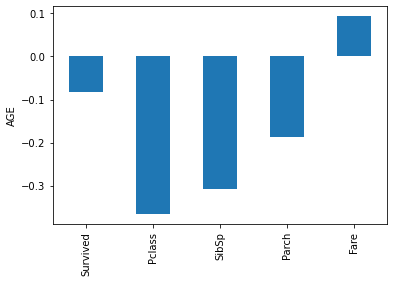

In [13]:
# Cheaking the correlation between age and other feature so that we can impute the null values using itertive imputer 

df.corr()['Age'].drop(['Age']).plot(kind='bar')
plt.ylabel("AGE")

Here we can see that Age having good CORRELATION with 'Pclass' and 'SibSP' we will try to impute Age using these  2 features

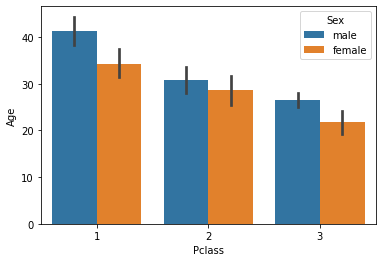

In [14]:
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Sex'])
plt.show()

Before imputing  we want a clear confirmation that there is a correlation in between Age and class of travelling .
As here we can observe that Passenger of calss 1 are of higher age group as compare to class2 and same type of distribution we can see in between class 2 and class 3

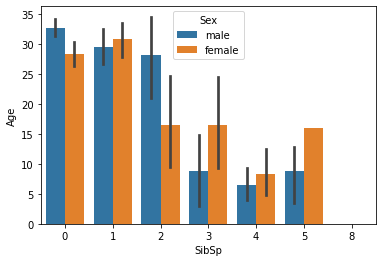

In [15]:
sns.barplot(x=df['SibSp'],y=df['Age'],hue=df['Sex'])
plt.show()

In this plot we can observe that person of higher age group are prefering to travel alone or with one partner only , so here also it shows a correlation with age group.

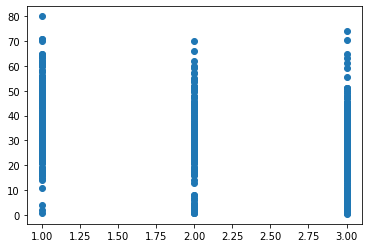

In [16]:
plt.scatter(x=df['Pclass'],y=df['Age'])
plt.show()

IMPUTING NULL VALUES IN AGE COLUMN

In [17]:
# Use of iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [18]:
it_im=IterativeImputer()

In [23]:
dat=pd.DataFrame(it_im.fit_transform(df[['Age','Pclass']]))
dat

,0,1
0,22.000000,3.0
1,38.000000,1.0
2,26.000000,3.0
3,35.000000,1.0
4,35.000000,3.0
...,...,...
884,24.870990,2.0
885,26.000000,1.0
886,32.000000,3.0
887,29.208605,1.0


In [34]:
import warnings
warnings.filterwarnings('ignore')
dat.isnull().sum()


0    0
1    0
dtype: int64

In [35]:
df['Age']=dat[0]

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

we can see that there are still  2 null values are present , so we are checking the distribution of the data ..2222

In [38]:
df['Age'].describe()

count    887.000000
mean      29.243226
std       13.114092
min        0.420000
25%       22.000000
50%       26.000000
75%       36.250000
max       80.000000
Name: Age, dtype: float64

In this distribution of data we dont feel any problem so we are going to discard the present null values

In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
df.shape

(887, 8)

WE HAVE IMPUTED ALL THE NULL VALUES SUCCESSFULLY

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


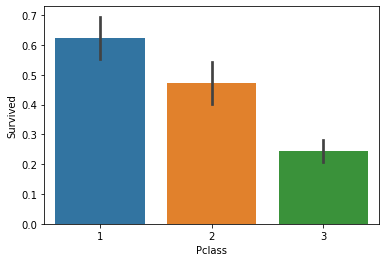

In [48]:
sns.barplot(x=df['Pclass'],y=df['Survived'])
plt.show()

Observation-
Passenger with higher class like 1 and 2 are having more chances of survival as compare to the lower class.

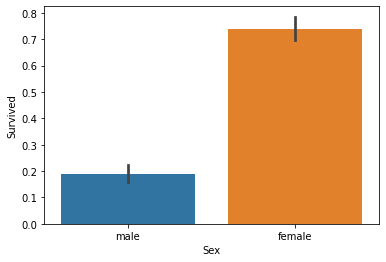

In [47]:
sns.barplot(x=df['Sex'],y=df['Survived'])
plt.show()

observation-
Female are having more chances of servival.

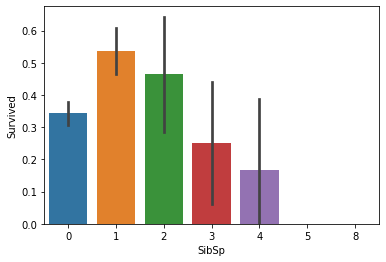

In [46]:
sns.barplot(x=df['SibSp'],y=df['Survived'])
plt.show()

Observation- 
Passenger with a group of 3 or 4 are having less chances of servival as compared to alone or with 1or 2 partners

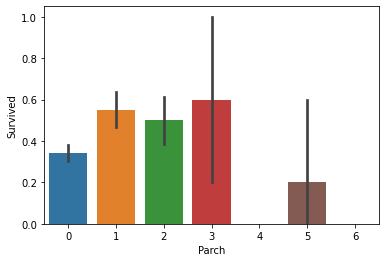

In [49]:
sns.barplot(x=df['Parch'],y=df['Survived'])
plt.show()

observation-
person with parent or less chieldren (1-3) are having more chances of servival 

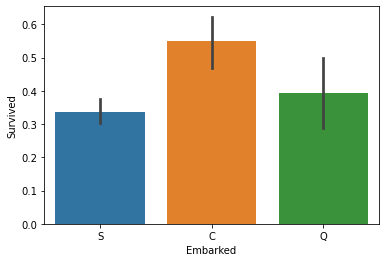

In [50]:
sns.barplot(x=df['Embarked'],y=df['Survived'])
plt.show()

observation-
from the plot we can see that embarking from C and Q are having more chances of servival than S

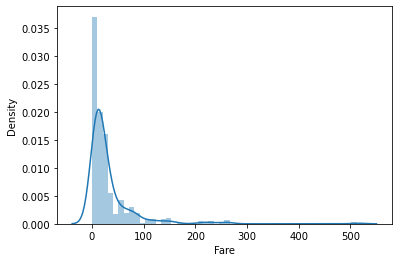

In [51]:
sns.distplot(df['Fare'])
plt.show()

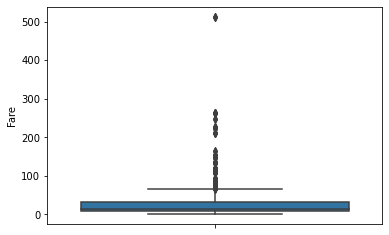

In [54]:
sns.boxplot(y=df['Fare'])
plt.show()

#### FARE HAVE SIGNIFICANT AMOUNT OF OUTLIERS BUT CAN BE SEENS AS NORMALLY DISTRIBUTED

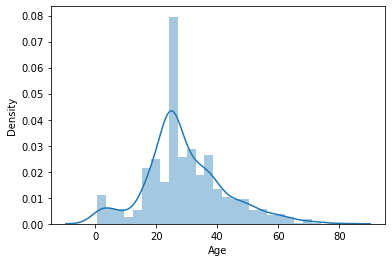

In [55]:
sns.distplot(df['Age'])
plt.show()

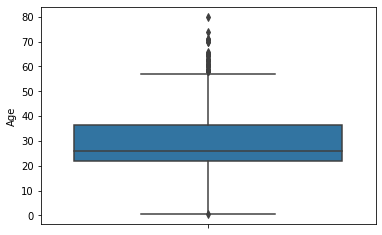

In [56]:
sns.boxplot(y=df['Age'])
plt.show()

#### AGE IS-A LITTLE SKEWED TO THE RIGHT BUT CONTAINS LESS NUMBER OF OUTLIERS

In [57]:
df.skew().sort_values()

Pclass     -0.638455
Survived    0.485726
Age         0.530962
Parch       2.741198
SibSp       3.686760
Fare        4.796347
dtype: float64

As we can see that the skewness in fare coloumn is much more as compared to age .
Other are categorical column so we will not consider for the skewness

In [58]:
from scipy.stats import zscore

In [60]:
fg=pd.get_dummies(df[['Sex','Embarked']])

In [61]:
df=pd.concat([df,fg],axis=1)

In [62]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [63]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [64]:
z_score=np.abs(zscore(df))

In [66]:
dfh=df[(z_score<3).all(axis=1)]

In [67]:
dfh.shape

(745, 11)

In [68]:
#Percentage loss od data calculated

(889-745)/889*100


16.197975253093365

loss ao data are more than 15 percent , so we cant remove the outliers

In [69]:
# cheaking for the data imbalance in our Target
df['Survived'].value_counts()

0    548
1    339
Name: Survived, dtype: int64

No Data imbalance found

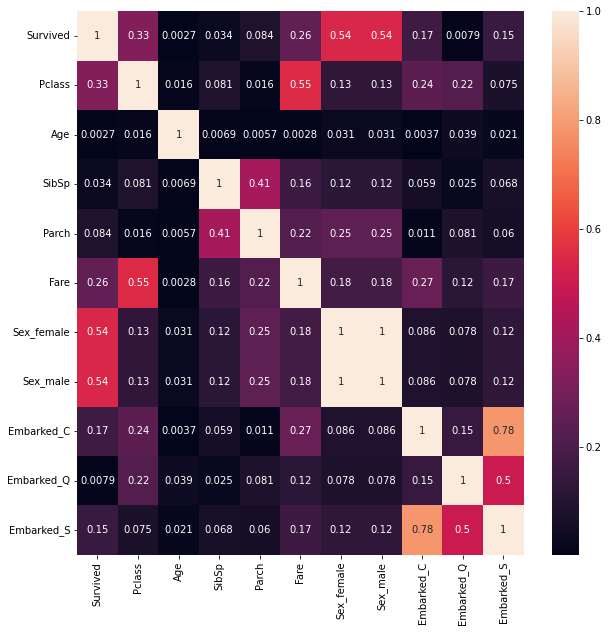

In [70]:
# Heat map to found the correlation among the features

plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.show()

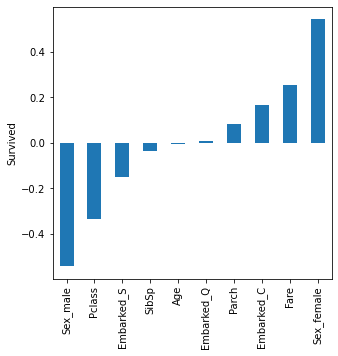

In [72]:
df.corr()['Survived'].drop(['Survived']).sort_values().plot(kind='bar',figsize=(5,5))
plt.ylabel('Survived')
plt.show()

BUT WE WILL STILL CHECK FOR THE MULTI COLLINEARITY USING VIF FACTOR METHOD

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

 FOR STANDARDISATION THE DATA WE WILL USE POWER TRANSFORMER

In [74]:
from sklearn.preprocessing import PowerTransformer

In [75]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)



In [76]:
x=df.drop(['Survived'],axis=1)


In [77]:
y=df['Survived']

In [78]:
x_scaled=pd.DataFrame(pt.fit_transform(x))

0   -0.445111
1    0.065530
2    0.802235
3    1.221964
4   -0.041334
5    0.621985
6   -0.621985
7    1.597482
8    2.965552
9   -1.015392
dtype: float64


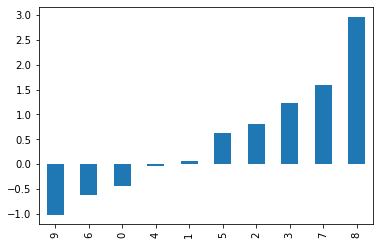

In [79]:
print(x_scaled.skew())
x_scaled.skew().sort_values().plot(kind='bar')
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
x_scale=pd.DataFrame(sc.fit_transform(x))

In [83]:
x_scale.skew().sort_values()

9   -1.015392
0   -0.638455
6   -0.621985
1    0.530962
5    0.621985
7    1.597482
3    2.741198
8    2.965552
2    3.686760
4    4.796347
dtype: float64

Skewness and standerdisation through power transformation showing much better result so we go with Power Transformation

MULTI COLLINEARITY USING VIF FACTOR METHOD

In [85]:
vif=pd.DataFrame()

In [86]:
vif['Features']=x.columns

In [87]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [88]:
vif[:5]

,Features,scores
0,Pclass,1.855641
1,Age,1.002669
2,SibSp,1.405039
3,Parch,1.413690
4,Fare,2.345603


THEIR IS NO ISSUE OF MULTI-COLLINEARITY EXISTS IN OUR DATASET

In [89]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

In [91]:
for i in range (0,1100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 124


TRAINING ACCURACY IS -77.89  --AND TESTING ACCURACY IS 77.93


AT RANDOM STATE-- 135


TRAINING ACCURACY IS -77.89  --AND TESTING ACCURACY IS 77.93


AT RANDOM STATE-- 191


TRAINING ACCURACY IS -78.8  --AND TESTING ACCURACY IS 78.83


AT RANDOM STATE-- 374


TRAINING ACCURACY IS -78.8  --AND TESTING ACCURACY IS 78.83


AT RANDOM STATE-- 413


TRAINING ACCURACY IS -77.89  --AND TESTING ACCURACY IS 77.93


AT RANDOM STATE-- 496


TRAINING ACCURACY IS -78.8  --AND TESTING ACCURACY IS 78.83


AT RANDOM STATE-- 498


TRAINING ACCURACY IS -77.89  --AND TESTING ACCURACY IS 77.93


AT RANDOM STATE-- 545


TRAINING ACCURACY IS -77.89  --AND TESTING ACCURACY IS 77.93


AT RANDOM STATE-- 849


TRAINING ACCURACY IS -78.8  --AND TESTING ACCURACY IS 78.83


AT RANDOM STATE-- 877


TRAINING ACCURACY IS -78.8  --AND TESTING ACCURACY IS 78.83


AT RANDOM STATE-- 1046


TRAINING ACCURACY IS -78.8  --AND TESTING ACCURACY IS 78.83


AT RANDOM STATE-- 1082


TRAINING ACCURACY IS 

#### SINCE AT RANDOM STATE 191 WE ARE GETTING LESS DIFFERENCES BETWEEN TRAIN AND TEST WE WILL MOVE WITH RANDOM STATE 191

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=191,test_size=0.25)

In [101]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
lr_train_pred=lr.predict(x_train)
lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
lr_test_accuracy=accuracy_score(y_test,lr_test_pred)

In [102]:
print(f"\nACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --{round(lr_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --78.8


In [103]:
print(f"\nACCURACY SCORE TESTING FOR LOGISTIC REGRESSION  --{round(lr_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR LOGISTIC REGRESSION  --78.83


In [104]:
for j in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=j).mean()
    print('\n\nAT CV =',j)
    print('\n\nCROSS VAL SCORE IS --',cross_val)
    print('\n\nACCURACY SCORE IS --',lr_test_accuracy)
    print('*********------------------------------******************')
    



AT CV = 2


CROSS VAL SCORE IS -- 0.7542477579159295


ACCURACY SCORE IS -- 0.7882882882882883
*********------------------------------******************


AT CV = 3


CROSS VAL SCORE IS -- 0.7767712627882121


ACCURACY SCORE IS -- 0.7882882882882883
*********------------------------------******************


AT CV = 4


CROSS VAL SCORE IS -- 0.773404060168766


ACCURACY SCORE IS -- 0.7882882882882883
*********------------------------------******************


AT CV = 5


CROSS VAL SCORE IS -- 0.7745127912143719


ACCURACY SCORE IS -- 0.7882882882882883
*********------------------------------******************


AT CV = 6


CROSS VAL SCORE IS -- 0.772285040142183


ACCURACY SCORE IS -- 0.7882882882882883
*********------------------------------******************


AT CV = 7


CROSS VAL SCORE IS -- 0.7722695377363544


ACCURACY SCORE IS -- 0.7882882882882883
*********------------------------------******************


AT CV = 8


CROSS VAL SCORE IS -- 0.774539312039312


ACCURACY SCORE I

### AT CV=3 WE ARE GETTING LESS DIFFERNCE BETWEEN OUR SCORES BETWEEN CROSS VAL SCORE AND ACCURACY SCORE OUR MODEL IT IMPLIES THAT OUR MODEL IS NOT OVERFITTING AND SCORES ARE REASONABLE

In [106]:
print(f"\nCROSS VAL SCORE---{round(cross_val_score(lr,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE---77.68


In [107]:
#CLASSIFICATION MATRIX AND CONFUSION MATRIX FOR LOGISTIC REGRESSION

from sklearn.metrics import classification_report
print(f"CLASSIFICATION REPORT FOR LOGISTIC REGRESSION ---\n\n\n {(classification_report(y_test,lr_test_pred))}")

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION ---


               precision    recall  f1-score   support

           0       0.78      0.89      0.83       131
           1       0.80      0.65      0.72        91

    accuracy                           0.79       222
   macro avg       0.79      0.77      0.77       222
weighted avg       0.79      0.79      0.78       222



In [108]:
print(f"CONFUSION MATRIX FOR LOGISTIC REGRESSION ---\n\n\n {(confusion_matrix(y_test,lr_test_pred))}")

CONFUSION MATRIX FOR LOGISTIC REGRESSION ---


 [[116  15]
 [ 32  59]]


In [109]:
print(f"\nACCURACY SCORE TESTIING FOR LOGISTIC REGRESSION  at random state 191 --{round(lr_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE AT CV=3---{round(cross_val_score(lr,x_scaled,y,cv=3).mean()*100,2)}")
print(f"\nACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --{round(lr_train_accuracy*100,2)}")


ACCURACY SCORE TESTIING FOR LOGISTIC REGRESSION  at random state 191 --78.83

CROSS VAL SCORE AT CV=3---77.68

ACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --78.8


### Random Forest Classification

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)
rfc_test_accuracy=accuracy_score(y_test,rfc_test_pred)
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)
print(f"\nACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --99.25


In [112]:
print(f"\nACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_test_accuracy*100,2)}")


ACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --79.73


In [113]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---{round(cross_val_score(rfc,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---77.23


In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parma={"n_estimators":np.arange(50,60),
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(2,5),
       "oob_score":[True,False],
       }

In [116]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [117]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [118]:
rgsc.best_params_

{'criterion': 'gini',
 'min_samples_split': 4,
 'n_estimators': 53,
 'oob_score': False}

In [119]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=53,min_samples_split=4,oob_score=False)

In [120]:
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=53)

In [121]:
rfc_test_pred=rfc.predict(x_test)
rfc_train_pred=rfc.predict(x_train)
rfc_test_accuracy=accuracy_score(y_test,rfc_test_pred)
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)

In [122]:
print(f"\nACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --95.94


In [123]:
print(f"\nACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_test_accuracy*100,2)}")


ACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --81.08


In [124]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---{round(cross_val_score(rfc,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---78.69


In [125]:
parma={"n_estimators":np.arange(60,70),
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(4,8),
       "oob_score":[True,False],
       }

In [126]:
rfc=RandomForestClassifier()

In [127]:
rgv=GridSearchCV(rfc,param_grid=parma)

In [128]:
rgv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([4, 5, 6, 7]),
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'oob_score': [True, False]})

In [129]:
rgv.best_params_

{'criterion': 'gini',
 'min_samples_split': 7,
 'n_estimators': 69,
 'oob_score': False}

In [131]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=7,n_estimators=67,oob_score=True)

In [132]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=7,
                       n_estimators=67, oob_score=True)

In [133]:
rfc_train_pred=rfc.predict(x_train)

In [134]:
rfc_test_pred=rfc.predict(x_test)

In [135]:
rfc_accuracy_score=accuracy_score(y_test,rfc_test_pred)

In [136]:
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)

In [137]:
print(f"\nACCURACY SCORE (Training) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE (Training) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --92.48


In [138]:
print(f"\nACCURACY SCORE(Testing) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_accuracy_score*100,2)}")


ACCURACY SCORE(Testing) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --80.18


In [139]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---{round(cross_val_score(rfc,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---78.81


In [140]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=7,n_estimators=67,oob_score=True)
rfc.fit(x_train,y_train)
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)
rfc_test_accuracy=accuracy_score(y_test,rfc_test_pred)
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)

In [141]:
print(f"\nACCURACY SCORE TRAINIG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINIG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --91.88


In [142]:
print(f"\nACCURACY SCORE TESTIONG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --{round(rfc_test_accuracy*100,2)}")


ACCURACY SCORE TESTIONG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 191 --78.83


In [143]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---{round(cross_val_score(rfc,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=3---78.8


In [144]:
print(f"CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFIER ---\n\n\n {(classification_report(y_test,rfc_test_pred))}")

CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFIER ---


               precision    recall  f1-score   support

           0       0.76      0.95      0.84       131
           1       0.88      0.56      0.68        91

    accuracy                           0.79       222
   macro avg       0.82      0.75      0.76       222
weighted avg       0.81      0.79      0.78       222



In [145]:
print(f"CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,rfc_test_pred))}")

CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER ---


 [[124   7]
 [ 40  51]]


### DECISION TREE

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [161]:
dt_train_pred=dt.predict(x_train)
dt_test_pred=dt.predict(x_test)
dt_train_pred=dt.predict(x_train)
dt_train_accuracy=accuracy_score(y_train,dt_train_pred)
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)

In [162]:
print(f"\nACCURACY SCORE (TRAINING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --{round(dt_train_accuracy*100,2)}")


ACCURACY SCORE (TRAINING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --99.25


In [163]:
print(f"\nACCURACY SCORE(TESTING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE(TESTING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --71.62


In [164]:
for j in range(2,10):
    cross_val=cross_val_score(dt,x_scaled,y,cv=j).mean()
    print('\n\nAT CV =',j)
    print('\n\nCROSS VAL SCORE IS --',cross_val)
    print('\n\nACCURACY SCORE IS --',dt_test_accuracy)
    print('--------------------***************************************----------------')
    



AT CV = 2


CROSS VAL SCORE IS -- 0.7158679559921095


ACCURACY SCORE IS -- 0.7162162162162162
--------------------***************************************----------------


AT CV = 3


CROSS VAL SCORE IS -- 0.7384562528630325


ACCURACY SCORE IS -- 0.7162162162162162
--------------------***************************************----------------


AT CV = 4


CROSS VAL SCORE IS -- 0.7316762463821288


ACCURACY SCORE IS -- 0.7162162162162162
--------------------***************************************----------------


AT CV = 5


CROSS VAL SCORE IS -- 0.7463403796102328


ACCURACY SCORE IS -- 0.7162162162162162
--------------------***************************************----------------


AT CV = 6


CROSS VAL SCORE IS -- 0.7441012441012441


ACCURACY SCORE IS -- 0.7162162162162162
--------------------***************************************----------------


AT CV = 7


CROSS VAL SCORE IS -- 0.749620583141393


ACCURACY SCORE IS -- 0.7162162162162162
--------------------*******************

In [165]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=2---{round(cross_val_score(dt,x_scaled,y,cv=2).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=2---71.25


SINCE THERE IS NELGLIGIBLY SMALL DIFFERENCE BETWEEN CROSS VAL SCORE AND ACCURACY_SCORE MODEL IS NOT OVER OR UNDERFITTING

HYPER TUNING THE PARAMETERS FOR CHECKING IF WE CAN INCREASE THE ACCURACY AND MAKE IT A BETTER MODEL

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
params={"max_depth":np.arange(25,30),
       "min_samples_leaf":np.arange(5,9),
       "min_samples_split":np.arange(3,5),
       "criterion":['gini','entropy']}

In [168]:
gs=GridSearchCV(dt,param_grid=params)
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([5, 6, 7, 8]),
                         'min_samples_split': array([3, 4])})

In [169]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [171]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=25,min_samples_leaf=5,min_samples_split=4)


In [174]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=4)

In [175]:
dt_test_pred=dt.predict(x_test)
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)
print(f"\nACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --81.53


In [176]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=2---{round(cross_val_score(dt,x_scaled,y,cv=2).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=2---76.1


In [177]:
params={"max_depth":np.arange(30,40),
       "min_samples_leaf":np.arange(4,6),
       "min_samples_split":np.arange(2,5),
       "criterion":['gini','entropy']}

In [178]:
dt=DecisionTreeClassifier()
gs=GridSearchCV(dt,param_grid=params)
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
                         'min_samples_leaf': array([4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [179]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [180]:
dt=gs.best_estimator_
dt_test_pred=dt.predict(x_test)
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)

In [181]:
print(f"\nACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 191 --79.73


In [182]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=2---{round(cross_val_score(dt,x_scaled,y,cv=2).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=2---73.28


#### CLASSIFICATION REPORT FOR DECISION TREE CLASSIFIER MODEL

In [183]:
print(f"CLASSIFICATION REPORT FOR DECISION TREE CLASSIFIER ---\n\n\n {(classification_report(y_test,dt_test_pred))}")

CLASSIFICATION REPORT FOR DECISION TREE CLASSIFIER ---


               precision    recall  f1-score   support

           0       0.77      0.95      0.85       131
           1       0.88      0.58      0.70        91

    accuracy                           0.80       222
   macro avg       0.82      0.76      0.77       222
weighted avg       0.81      0.80      0.79       222



#### CONFUSION MATRIX FOR DECISION TREE MODEL

In [184]:
print(f"CONFUSION MATRIX FOR LOGISTIC REGRESSION ---\n\n\n {(confusion_matrix(y_test,dt_test_pred))}")

CONFUSION MATRIX FOR LOGISTIC REGRESSION ---


 [[124   7]
 [ 38  53]]


In [185]:
print(f"\nACCURACY SCORE at random state 191 --{round(dt_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE AT CV=2---{round(cross_val_score(dt,x_scaled,y,cv=2).mean()*100,2)}")


ACCURACY SCORE at random state 191 --79.73

CROSS VAL SCORE AT CV=2---74.3


### BAGGING CLASSIFIER

In [186]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [187]:
bc_train_pred=bc.predict(x_train)
bc_test_pred=bc.predict(x_test)
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [188]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --{round(bc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --96.84


In [189]:
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --{round(bc_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --80.18


In [190]:
for j in range(2,10):
    cross_val=cross_val_score(bc,x_scaled,y,cv=j).mean()
    print('\n\nAT CV =',j)
    print('\n\nCROSS VAL SCORE IS --',cross_val)
    print('\n\nACCURACY SCORE IS --',bc_test_accuracy)
    print('*****************************************')
    



AT CV = 2


CROSS VAL SCORE IS -- 0.7666275191670227


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 3


CROSS VAL SCORE IS -- 0.7824133455489387


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 4


CROSS VAL SCORE IS -- 0.7745199951082303


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 5


CROSS VAL SCORE IS -- 0.7790516092172919


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 6


CROSS VAL SCORE IS -- 0.765489979775694


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 7


CROSS VAL SCORE IS -- 0.7778759797882406


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 8


CROSS VAL SCORE IS -- 0.774539312039312


ACCURACY SCORE IS -- 0.8018018018018018
*****************************************


AT CV = 9


CROSS VAL SCORE

In [191]:
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=3---{round(cross_val_score(bc,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=3---77.0


#### HYPER PARAMETER TUNING *

In [192]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }
bcgs=GridSearchCV(bc,param_grid=par)
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [193]:
bcgs.best_params_

{'n_estimators': 57, 'oob_score': True, 'random_state': 350}

In [194]:
bc=BaggingClassifier(base_estimator=dt,n_estimators=57,oob_score=True,random_state=350)

In [195]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=30,
                                                        min_samples_leaf=4,
                                                        min_samples_split=4),
                  n_estimators=57, oob_score=True, random_state=350)

In [196]:
bc_train_pred=bc.predict(x_train)
bc_test_pred=bc.predict(x_test)
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [197]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --{round(bc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --89.17


In [198]:
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --{round(bc_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --81.53


In [199]:
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=3---{round(cross_val_score(bc,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=3---78.69


In [200]:
bc=BaggingClassifier(base_estimator=dt,n_estimators=57,oob_score=True,random_state=350)

In [201]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=30,
                                                        min_samples_leaf=4,
                                                        min_samples_split=4),
                  n_estimators=57, oob_score=True, random_state=350)

In [203]:
bc_train_pred=bc.predict(x_train)
bc_test_pred=bc.predict(x_test)
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [204]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --{round(bc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --{round(bc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=3---{round(cross_val_score(bc,x_scaled,y,cv=3).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --89.17

ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 191 --81.53

CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=3---78.69


In [205]:
print(f"CLASSIFICATION REPORT FOR BAGGINGG CLASSIFIER ---\n\n\n {(classification_report(y_test,bc_test_pred))}")

CLASSIFICATION REPORT FOR BAGGINGG CLASSIFIER ---


               precision    recall  f1-score   support

           0       0.78      0.95      0.86       131
           1       0.90      0.62      0.73        91

    accuracy                           0.82       222
   macro avg       0.84      0.78      0.80       222
weighted avg       0.83      0.82      0.81       222



In [206]:
print(f"CONFUSION MATRIX FOR BAGGING CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,bc_test_pred))}")

CONFUSION MATRIX FOR BAGGING CLASSIFIER ---


 [[125   6]
 [ 35  56]]


### ------------KNN- CLassifier---------

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [208]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
knn_train_accuracy=accuracy_score(y_train,knn_train_pred)
knn_test_accuracy=accuracy_score(y_test,knn_test_pred)

In [210]:
print(f"\nACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 191 --{round(knn_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 191 --82.71


In [211]:
print(f"\nACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 191 --{round(knn_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 191 --77.93


In [212]:
print(f"\nCROSS VAL SCORE FOR KNN AT CV=3---{round(cross_val_score(knn,x_scaled,y,cv=3).mean()*100,2)}")


CROSS VAL SCORE FOR KNN AT CV=3---78.24


### HYPER PARAMETER TUNING--

In [213]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [214]:
knn=KNeighborsClassifier()

In [215]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [216]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [217]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [218]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5}

In [219]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=25,n_neighbors=5)

In [220]:
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=25)

In [221]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
knn_train_accuracy=accuracy_score(y_train,knn_train_pred)
knn_test_accuracy=accuracy_score(y_test,knn_test_pred)


In [224]:
print(f"\nACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 191 --{round(knn_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 191 --{round(knn_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR KNN AT CV=3---{round(cross_val_score(knn,x_scaled,y,cv=3).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 191 --82.71

ACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 191 --77.93

CROSS VAL SCORE FOR KNN AT CV=3---78.24


##TUNING  AGAIN

In [226]:
knn=KNeighborsClassifier()
pars={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(2,5),
    'leaf_size':[25,28,30,32,35,38,40,45,50,36,38]}

In [227]:
kgsc=GridSearchCV(knn,param_grid=pars)
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38, 40, 45, 50, 36,
                                       38],
                         'n_neighbors': array([2, 3, 4])})

In [228]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4}

In [229]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=25,n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=4)

In [230]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
knn_train_accuracy=accuracy_score(y_train,knn_train_pred)
knn_test_accuracy=accuracy_score(y_test,knn_test_pred)

In [232]:
print(f"\nACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 191 --{round(knn_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 191 --{round(knn_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR KNN AT CV=3---{round(cross_val_score(knn,x_scaled,y,cv=3).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 191 --83.61

ACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 191 --77.03

CROSS VAL SCORE FOR KNN AT CV=3---78.24


In [233]:
print(f"CLASSIFICATION REPORT FOR KNN CLASSIFIER---\n\n\n {(classification_report(y_test,knn_test_pred))}")

CLASSIFICATION REPORT FOR KNN CLASSIFIER---


               precision    recall  f1-score   support

           0       0.74      0.95      0.83       131
           1       0.88      0.51      0.64        91

    accuracy                           0.77       222
   macro avg       0.81      0.73      0.74       222
weighted avg       0.80      0.77      0.75       222



In [234]:
print(f"CONFUSION MATRIX FOR BAGGING CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,knn_test_pred))}")

CONFUSION MATRIX FOR BAGGING CLASSIFIER ---


 [[125   6]
 [ 45  46]]


### ADABOOST CLASSIFIER-

In [235]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [236]:
adc_train_pred=adc.predict(x_train)
adc_test_pred=adc.predict(x_test)
adc_train_accuracy=accuracy_score(y_train,adc_train_pred)
adc_test_accuracy=accuracy_score(y_test,adc_test_pred)
print(f"\nACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 191 --{round(adc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 191 --{round(adc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR ADC AT CV=3---{round(cross_val_score(adc,x_scaled,y,cv=3).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 191 --82.11

ACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 191 --80.18

CROSS VAL SCORE FOR ADC AT CV=3---77.68


In [237]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [238]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}
adgs=GridSearchCV(adc,param_grid=param)
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [239]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 60, 'random_state': 121}

In [240]:
adc=AdaBoostClassifier(algorithm='SAMME',
                      n_estimators=60,
                       random_state=121)

In [241]:
adc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121)

In [242]:
adc_train_pred=adc.predict(x_train)
adc_test_pred=adc.predict(x_test)
adc_train_accuracy=accuracy_score(y_train,adc_train_pred)
adc_test_accuracy=accuracy_score(y_test,adc_test_pred)
print(f"\nACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 191 --{round(adc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 191 --{round(adc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR ADC AT CV=3---{round(cross_val_score(adc,x_scaled,y,cv=3).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 191 --79.25

ACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 191 --79.28

CROSS VAL SCORE FOR ADC AT CV=3---76.55


In [243]:
print(f"CLASSIFICATION REPORT FOR ADC CLASSIFIER---\n\n\n {(classification_report(y_test,adc_test_pred))}")

CLASSIFICATION REPORT FOR ADC CLASSIFIER---


               precision    recall  f1-score   support

           0       0.80      0.87      0.83       131
           1       0.78      0.68      0.73        91

    accuracy                           0.79       222
   macro avg       0.79      0.78      0.78       222
weighted avg       0.79      0.79      0.79       222



In [244]:
print(f"CONFUSION MATRIX FOR ADC CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,adc_test_pred))}")

CONFUSION MATRIX FOR ADC CLASSIFIER ---


 [[114  17]
 [ 29  62]]


In [245]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [246]:
svc_train_pred=svc.predict(x_train)
svc_test_pred=svc.predict(x_test)
svc_train_accuracy=accuracy_score(y_train,svc_train_pred)
svc_test_accuracy=accuracy_score(y_test,svc_test_pred)
print(f"\nACCURACY SCORE TRAINING FOR SVM   AT RANDOM STATE 191 --{round(svc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR SVM AT RANDOM STATE 191 --{round(svc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR SVM AT CV=3---{round(cross_val_score(svc,x_scaled,y,cv=3).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR SVM   AT RANDOM STATE 191 --81.95

ACCURACY SCORE TESTING FOR SVM AT RANDOM STATE 191 --80.18

CROSS VAL SCORE FOR SVM AT CV=3---80.72


In [247]:
print(f"CLASSIFICATION REPORT FOR SVC CLASSIFIER---\n\n\n {(classification_report(y_test,svc_test_pred))}")

CLASSIFICATION REPORT FOR SVC CLASSIFIER---


               precision    recall  f1-score   support

           0       0.76      0.98      0.85       131
           1       0.94      0.55      0.69        91

    accuracy                           0.80       222
   macro avg       0.85      0.76      0.77       222
weighted avg       0.83      0.80      0.79       222



In [248]:
print(f"CONFUSION MATRIX FOR SVC CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,svc_test_pred))}")

CONFUSION MATRIX FOR SVC CLASSIFIER ---


 [[128   3]
 [ 41  50]]


In [ ]:
PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG

In [249]:
from sklearn.metrics import plot_roc_curve

#### ROC curve for training data

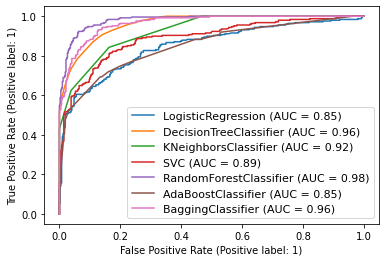

In [250]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### ROC curve for testing Data

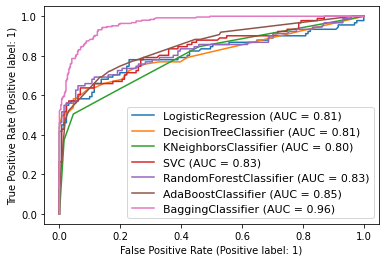

In [251]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

SINCE BAGGING CLASSIFIER HAVE HIGH VALUES FOR ACCURACIES FOR BOTH TRAINING AND TESTING AND THERE IS A VERY LESS DIFFERENCE BETWEEN CROSS VAL SCORE ,ACCURAY SCORE FOR TRAINING AND TESTING SCORE FOR TESTING WE WILL PROCEED WITH THIS MODEL